In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Dataset.xls')
df.head()

,Employee_ID,Absence_Reason,Date,Transportation_Expense,Distance_to_Work,Employment_Service_Time,Employee_Age,Daily_Workload_Average,Target_Achievement_Rate,Disciplinary_Incident,Education_Level,Children,Social_Drinker_Status,Social_Smoker_Status,Employee_Weight,Employee_Height,BMI,Absence_Duration_Hours
0,11,26,07/07/2015,289,36,13,33,239554,97,0,1,2,1,0,90,172,30,4
1,36,0,14/07/2015,118,13,18,50,239554,97,1,1,1,1,0,98,178,31,0
2,3,23,15/07/2015,179,51,18,38,239554,97,0,1,0,1,0,89,170,31,2
3,7,7,16/07/2015,279,5,14,39,239554,97,0,1,2,1,1,68,168,24,4
4,11,23,23/07/2015,289,36,13,33,239554,97,0,1,2,1,0,90,172,30,2


In [3]:
df.shape

(700, 18)

In [4]:
count=df.isnull().sum()
count

Employee_ID                0
Absence_Reason             0
Date                       0
Transportation_Expense     0
Distance_to_Work           0
Employment_Service_Time    0
Employee_Age               0
Daily_Workload_Average     0
Target_Achievement_Rate    0
Disciplinary_Incident      0
Education_Level            0
Children                   0
Social_Drinker_Status      0
Social_Smoker_Status       0
 Employee_Weight           0
Employee_Height            0
BMI                        0
Absence_Duration_Hours     0
dtype: int64

In [5]:
df.describe()

,Employee_ID,Absence_Reason,Transportation_Expense,Distance_to_Work,Employment_Service_Time,Employee_Age,Daily_Workload_Average,Target_Achievement_Rate,Disciplinary_Incident,Education_Level,Children,Social_Drinker_Status,Social_Smoker_Status,Employee_Weight,Employee_Height,BMI,Absence_Duration_Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,12.658571,36.417143,271801.774286,94.537143,0.054286,1.282857,1.021429,0.575714,0.071429,79.140000,172.038571,26.737143,6.761429
std,11.028144,8.356292,66.312960,14.804446,4.326020,6.379083,40021.804183,3.851320,0.226743,0.668090,1.112215,0.494588,0.257724,12.830594,6.018802,4.254701,12.670082
min,1.000000,0.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,9.000000,31.000000,241476.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,108.000000,196.000000,38.000000,120.000000


In [1]:
df.duplicated().sum()
df=df.drop_duplicates()

NameError: name 'df' is not defined

In [7]:
df=df.drop('Employee_ID',axis=1)

In [8]:
type(df["Date"])

pandas.core.series.Series

In [9]:
# convert it to a date-time
df["Date"] = pd.to_datetime(df["Date"], format = '%d/%m/%Y')
# display the first date
df["Date"][0]

Timestamp('2015-07-07 00:00:00')

In [10]:

df['Year'] = df['Date'].dt.year

In [11]:
df['Month'] = df['Date'].dt.month

In [12]:
df['Weekday'] = df['Date'].dt.dayofweek

In [13]:

education_encoding = {1: "high_school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}
yes_no_encoding = {0: "No", 1: "Yes"}

df['Education_Level'] = df['Education_Level'].map(education_encoding)

df['Disciplinary_Incident'] = df['Disciplinary_Incident'].map(yes_no_encoding)

df['Social_Drinker_Status'] = df['Social_Drinker_Status'].map(yes_no_encoding)

df['Social_Smoker_Status'] = df['Social_Smoker_Status'].map(yes_no_encoding)


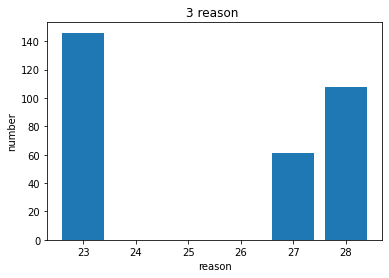

In [14]:
absence_reason_counts = df['Absence_Reason'].value_counts().head(3)

# رسم نمودار نوار
plt.bar(absence_reason_counts.index, absence_reason_counts.values)
plt.xlabel('reason')
plt.ylabel('number')
plt.title('3 reason ')
plt.show()

In [15]:
def in_icd(val):
    return 1 if val >= 1 and val <= 21 else 0

df["Disease"] = df["Absence_Reason"].apply(in_icd)

In [16]:
df[['Absence_Reason', 'Disease']]

,Absence_Reason,Disease
0,26,0
1,0,0
2,23,0
3,7,1
4,23,0
...,...,...
695,10,1
696,6,1
697,10,1
698,23,0


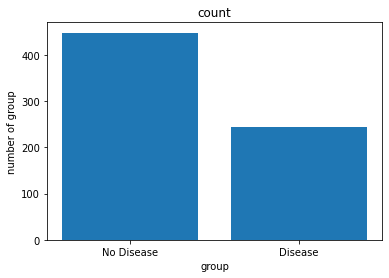

In [17]:
group_counts = df['Disease'].value_counts()

plt.bar(['No Disease', 'Disease'], group_counts)
plt.xlabel('group')
plt.ylabel('number of group')
plt.title('count')
plt.show()

In [18]:
df['Social_Drinker_Status'] = df['Social_Drinker_Status'].map({'Yes': 1, 'No': 0})
df['Social_Smoker_Status'] = df['Social_Smoker_Status'].map({'Yes': 1, 'No': 0})

alcohol_consumers = df['Social_Drinker_Status'].sum()
alcohol_consumers_percentage = (alcohol_consumers / len(df)) * 100


smokers = df['Social_Smoker_Status'].sum()
smokers_percentage = (smokers / len(df)) * 100


print("Percentage of employees who consume alcohol: {:.2f}%".format(alcohol_consumers_percentage))
print("Percentage of employees who smoke: {:.2f}%".format(smokers_percentage))

Percentage of employees who consume alcohol: 57.51%
Percentage of employees who smoke: 7.23%


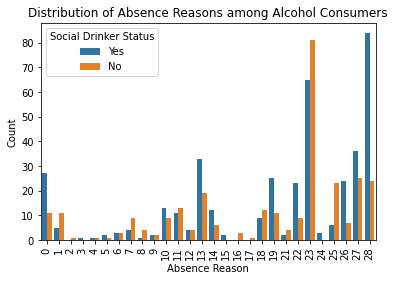

In [19]:
df['Social_Drinker_Status'] = df['Social_Drinker_Status'].map({1: 'Yes', 0: 'No'})


sns.countplot(data=df, x='Absence_Reason', hue='Social_Drinker_Status')
plt.xlabel('Absence Reason')
plt.ylabel('Count')
plt.title('Distribution of Absence Reasons among Alcohol Consumers')
plt.legend(title='Social Drinker Status')
plt.xticks(rotation=90)
plt.show()


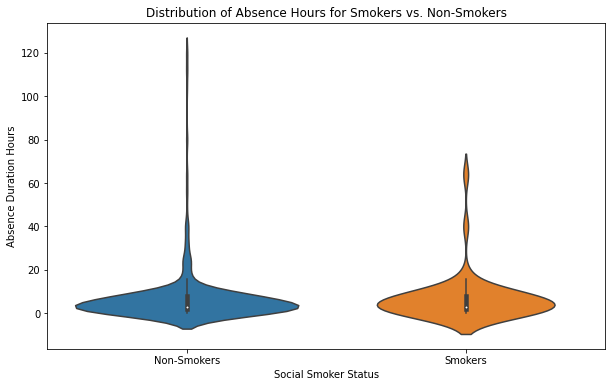

,Absence_Reason,Date,Transportation_Expense,Distance_to_Work,Employment_Service_Time,Employee_Age,Daily_Workload_Average,Target_Achievement_Rate,Disciplinary_Incident,Education_Level,...,Social_Drinker_Status,Social_Smoker_Status,Employee_Weight,Employee_Height,BMI,Absence_Duration_Hours,Year,Month,Weekday,Disease
0,26,2015-07-07,289,36,13,33,239554,97,No,high_school,...,Yes,0,90,172,30,4,2015,7,1,0
1,0,2015-07-14,118,13,18,50,239554,97,Yes,high_school,...,Yes,0,98,178,31,0,2015,7,1,0
2,23,2015-07-15,179,51,18,38,239554,97,No,high_school,...,Yes,0,89,170,31,2,2015,7,2,0
3,7,2015-07-16,279,5,14,39,239554,97,No,high_school,...,Yes,1,68,168,24,4,2015,7,3,1
4,23,2015-07-23,289,36,13,33,239554,97,No,high_school,...,Yes,0,90,172,30,2,2015,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,2018-05-23,179,22,17,40,237656,99,No,graduate,...,No,1,63,170,22,8,2018,5,2,1
696,6,2018-05-23,225,26,9,28,237656,99,No,high_school,...,No,0,69,169,24,3,2018,5,2,1
697,10,2018-05-24,330,16,4,28,237656,99,No,graduate,...,No,0,84,182,25,8,2018,5,3,1
698,23,2018-05-24,235,16,8,32,237656,99,No,postgraduate,...,No,0,75,178,25,2,2018,5,3,0


In [20]:
smokers = df[df['Social_Smoker_Status'] == 1]
non_smokers = df[df['Social_Smoker_Status'] == 0]

plt.figure(figsize=(10, 6))
plt.title('Distribution of Absence Hours for Smokers vs. Non-Smokers')
sns.violinplot(x='Social_Smoker_Status', y='Absence_Duration_Hours', data=df)
plt.xlabel('Social Smoker Status')
plt.ylabel('Absence Duration Hours')
plt.xticks([0, 1], ['Non-Smokers', 'Smokers'])

plt.show()

df

In [21]:
df['Social_Drinker_Status'] = df['Social_Drinker_Status'].map({'Yes':1, 'No':0})




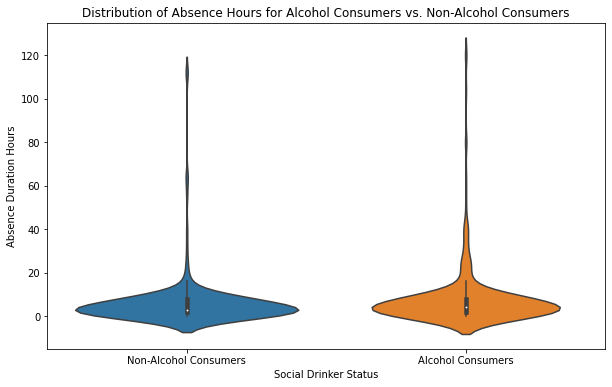

In [22]:
alcohol_consumers = df[df['Social_Drinker_Status'] == 1]
non_alcohol_consumers = df[df['Social_Drinker_Status'] == 0]


plt.figure(figsize=(10, 6))
plt.title('Distribution of Absence Hours for Alcohol Consumers vs. Non-Alcohol Consumers')
sns.violinplot(x='Social_Drinker_Status', y='Absence_Duration_Hours', data=df)
plt.xlabel('Social Drinker Status')
plt.ylabel('Absence Duration Hours')
plt.xticks([0, 1], ['Non-Alcohol Consumers', 'Alcohol Consumers'])

# Show the plot
plt.show()

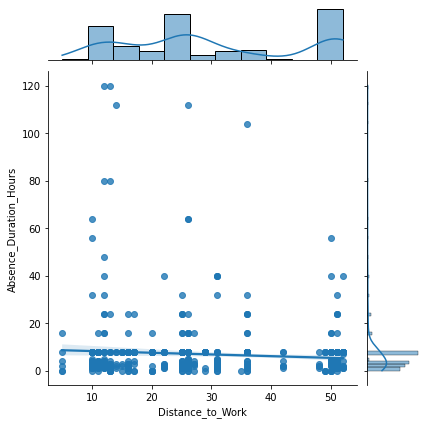

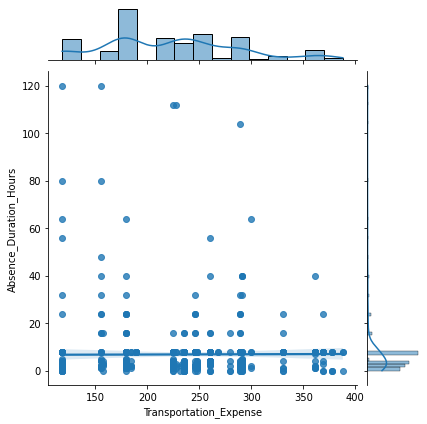

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt




sns.jointplot(x="Distance_to_Work", y="Absence_Duration_Hours", data=df, kind="reg")
plt.show()


sns.jointplot(x="Transportation_Expense", y="Absence_Duration_Hours", data=df, kind="reg")
plt.show()

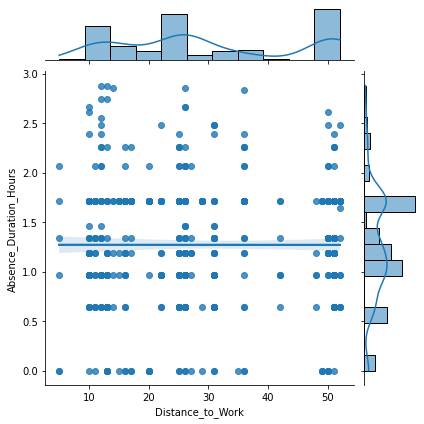

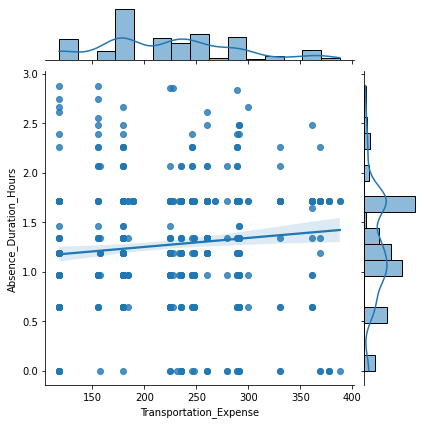

In [24]:
import scipy.stats as stats

# Apply Yeo-Johnson transformation on "Absence_Duration_Hours"
df["Absence_Duration_Hours"], _ = stats.yeojohnson(df["Absence_Duration_Hours"])

# Create joint plots again with the transformed data
sns.jointplot(x="Distance_to_Work", y="Absence_Duration_Hours", data=df, kind="reg")
plt.show()

sns.jointplot(x="Transportation_Expense", y="Absence_Duration_Hours", data=df, kind="reg")
plt.show()

C:\Users\B&E\AppData\Local\Temp\ipykernel_14792\2269339047.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


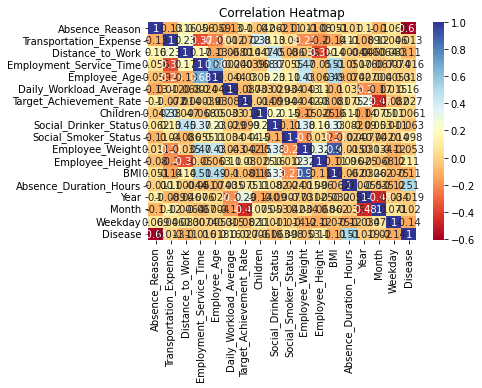

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()

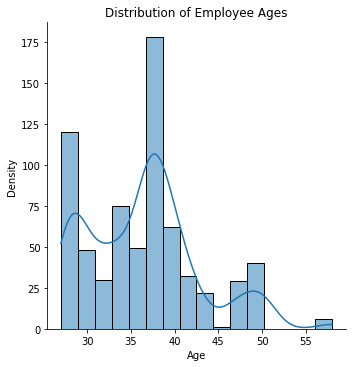

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of employee ages
sns.displot(df["Employee_Age"], kde=True)
plt.title("Distribution of Employee Ages")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

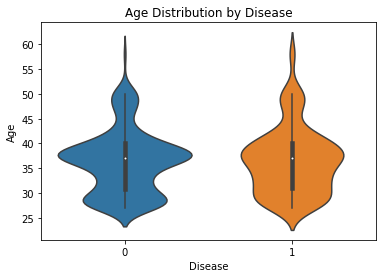

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the violin plot for age distribution based on "Disease" feature
sns.violinplot(x="Disease", y="Employee_Age", data=df)
plt.title("Age Distribution by Disease")
plt.xlabel("Disease")
plt.ylabel("Age")
plt.show()

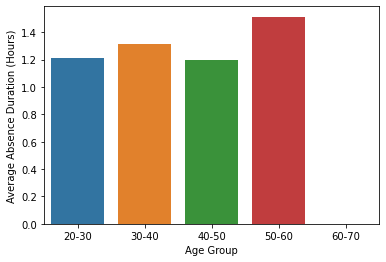

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



df['Employee_Age'] = df['Employee_Age'].astype(int)


df['Age_Group'] = pd.cut(df['Employee_Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])


absence_means = df.groupby('Age_Group')['Absence_Duration_Hours'].mean()

 
sns.barplot(x=absence_means.index, y=absence_means.values)


plt.xlabel('Age Group')
plt.ylabel('Average Absence Duration (Hours)')


plt.show()

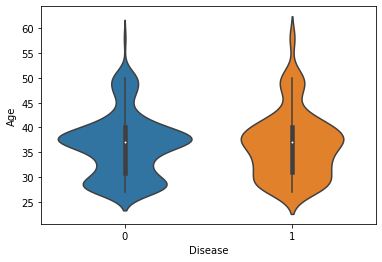

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



sns.violinplot(x='Disease', y='Employee_Age', data=df)


plt.xlabel('Disease')
plt.ylabel('Age')


plt.show()

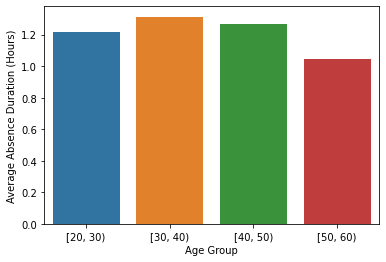

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





df['Age_Group'] = pd.cut(df['Employee_Age'], bins=np.arange(20, 70, 10), right=False)


absence_means = df.groupby('Age_Group')['Absence_Duration_Hours'].mean()


plt.figure(figsize=(6, 4))
sns.barplot(x=absence_means.index, y=absence_means.values)


plt.xlabel('Age Group')
plt.ylabel('Average Absence Duration (Hours)')


plt.show()

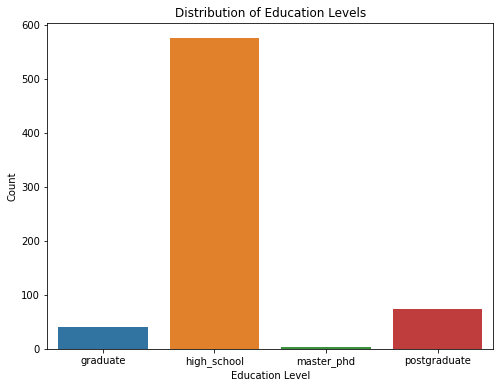

In [32]:

import seaborn as sns
import scipy.stats as stats



df['Education_Level'] = df['Education_Level'].astype('category')


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education_Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()








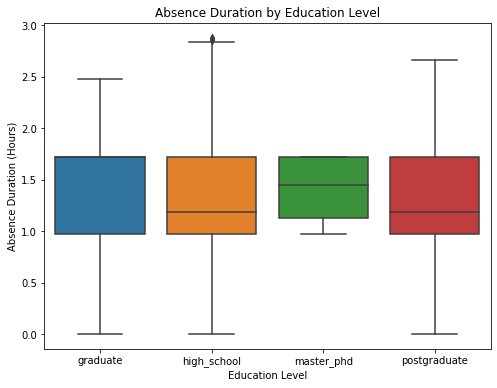

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Education_Level', y='Absence_Duration_Hours')
plt.xlabel('Education Level')
plt.ylabel('Absence Duration (Hours)')
plt.title('Absence Duration by Education Level')
plt.show()

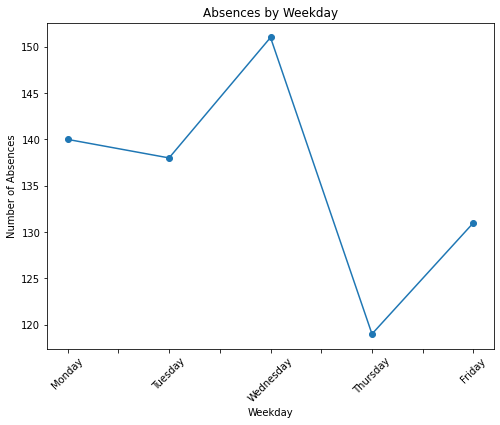

In [38]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Weekday'] = df['Date'].dt.strftime('%A')
absences_by_weekday = df.groupby('Weekday').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.figure(figsize=(8, 6))
absences_by_weekday.plot(kind='line', marker='o')
plt.xlabel('Weekday')
plt.ylabel('Number of Absences')
plt.title('Absences by Weekday')
plt.xticks(rotation=45)
plt.show()


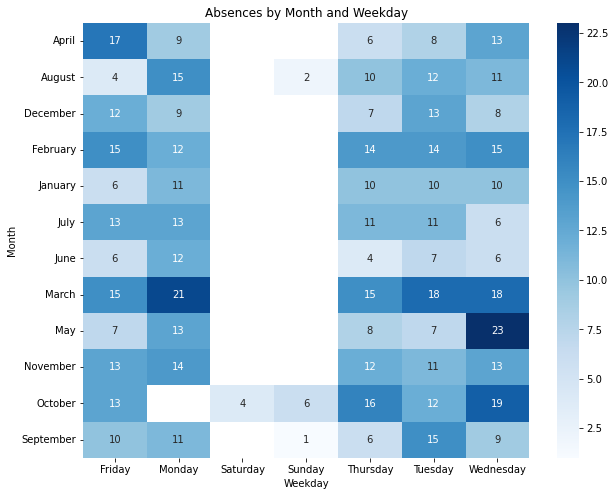

In [40]:
df['Month'] = df['Date'].dt.strftime('%B')
absences_by_month = df.groupby(['Month', 'Weekday']).size().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(absences_by_month, cmap='Blues', annot=True)
plt.xlabel('Weekday')
plt.ylabel('Month')
plt.title('Absences by Month and Weekday')
plt.show()

In [36]:

correlation = df['Children'].corr(df['Absence_Duration_Hours'])
print("Correlation between Number of Children and Absence Duration:", correlation)

children_absences = df[df['Children'] > 0]['Absence_Duration_Hours']
no_children_absences = df[df['Children'] == 0]['Absence_Duration_Hours']
t_statistic, p_value = stats.ttest_ind(children_absences, no_children_absences)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Correlation between Number of Children and Absence Duration: 0.11043007847519458
T-Statistic: 0.933918987873202
P-Value: 0.3506723816474451
